# Лабораторная работа № 3

Регрессионная модель изменения цен на дома в Бостоне

Выполнил:
    Студент группы БФИ1901
    Чернышов Дмитрий

# Цель работы:
Реализовать предсказание медианной цены на дома в пригороде Бостона в середине 1970-
х по таким данным, как уровень преступности, ставка местного имущественного налога и т.д.

Задачи:

   1. Ознакомиться с задачей регрессии
   2. Изучить отличие задачи регрессии от задачи классификации
   3. Создать модель
   4. Настроить параметры обучения
   5. Обучить и оценить модели
   6. Ознакомиться с перекрестной проверкой

Данный набор содержит относительно немного образцов данных: всего 506, разбитых на
404 обучающих и 102 контрольных образца.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

def chart_create(num, min_x, max_x, min_y, max_y, label):
    dpi=80
    plt.figure(num = num, dpi = dpi, figsize = (1024 / dpi, 512 / dpi))
    mpl.rcParams.update({'font.size':10})
    plt.axis([min_x, max_x, min_y, max_y])
    
    plt.title(label + 'Chart')
    plt.xlabel('Epoch')
    plt.ylabel(label)
    
def chart_printline(num, x_values, y_values, label):
    plt.figure(num = num)
    
    color = (np.random.random(), np.random.random(), np.random.random())
    plt.plot(x_values, y_values, color = color, linestyle = 'solid', label = label)
    plt.legend(loc = 'upper left')

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.482297122478485


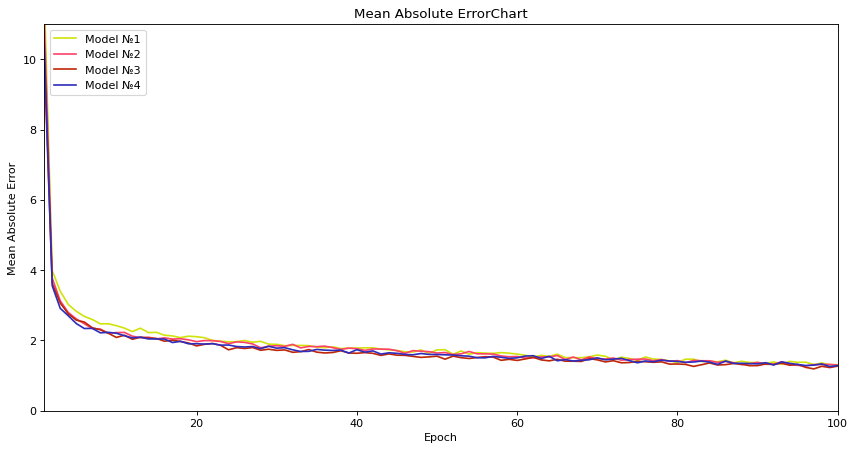

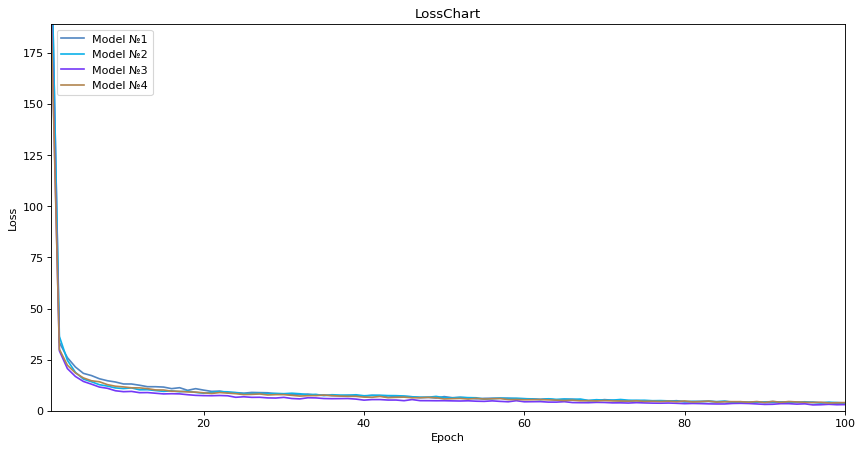

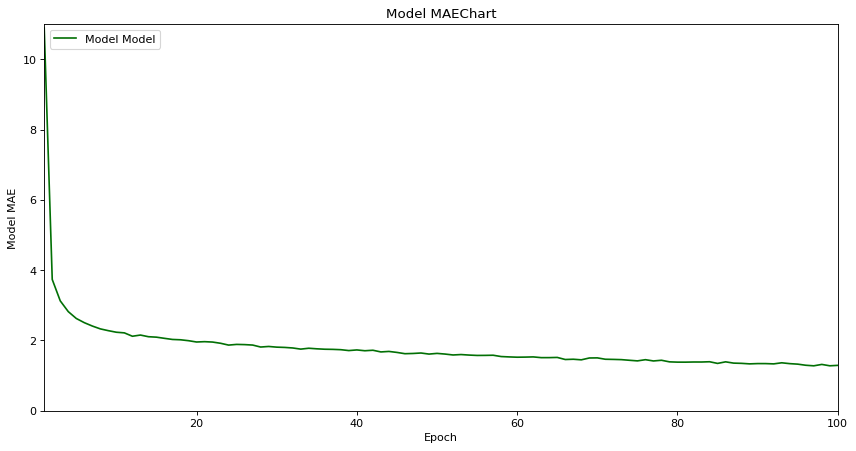

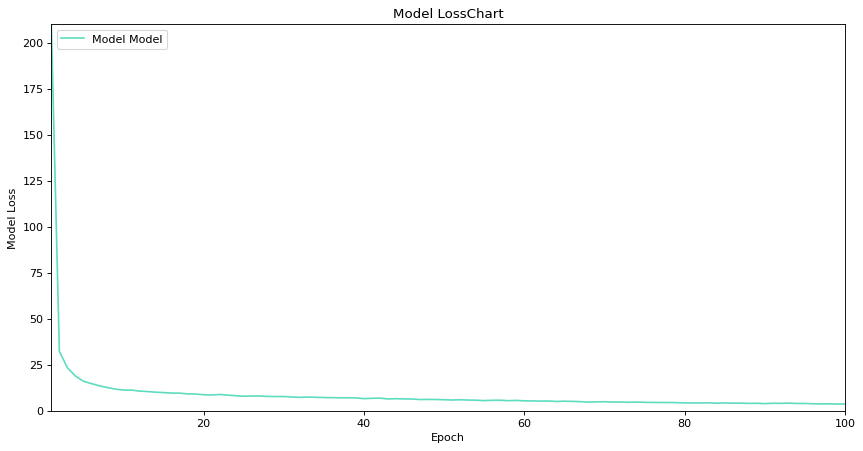

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

x_values = range(1, num_epochs + 1)

y_values_array1 = []
y_values_array2 = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    y_values1 = hist.history['mae']
    y_values2 = hist.history['loss']
    
    chart_create(1, 1, num_epochs, 0, math.ceil(max(y_values1)), 'Mean Absolute Error')
    chart_create(2, 1, num_epochs, 0, math.ceil(max(y_values2)), 'Loss')
    
    chart_printline(1, x_values, y_values1, 'Model №' + str(i+1))
    chart_printline(2, x_values, y_values2, 'Model №' + str(i+1))
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
    y_values_array1.append(y_values1)
    y_values_array2.append(y_values2)
    
print(np.mean(all_scores))

y_values_mean1 = []
y_values_mean2 = []

for i in range(len(y_values_array1[0])):
    mean_row = []
    for j in range(len(y_values_array1)):
        mean_row.append(y_values_array1[j][i])
    y_values_mean1.append(np.mean(mean_row))
    
for i in range(len(y_values_array2[0])):
    mean_row = []
    for j in range(len(y_values_array2)):
        mean_row.append(y_values_array2[j][i])
    y_values_mean2.append(np.mean(mean_row))  

chart_create(3, 1, num_epochs, 0, math.ceil(max(y_values_mean1)), 'Model MAE')
chart_create(4, 1, num_epochs, 0, math.ceil(max(y_values_mean2)), 'Model Loss')

chart_printline(3, x_values, y_values_mean1, 'Model Model')
chart_printline(4, x_values, y_values_mean2, 'Model Model')

## Вопрос 1 Объяснить различия задач классификации и регрессии 

В задачах классификации модель предсказывает, по данным значениям, принадлежность объекта к классу. Регрессионная модель предсказывает, по данным ей значениям, какое то значения из множества. Также можно выделить отличие в разных метриках точности. У регрессионной модели это - mae, mse и rmse (root mean squared error - корень из mse). 

## Вопрос 2 Изучить влияние кол-ва эпох на результат обучения модели

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.3809818625450134


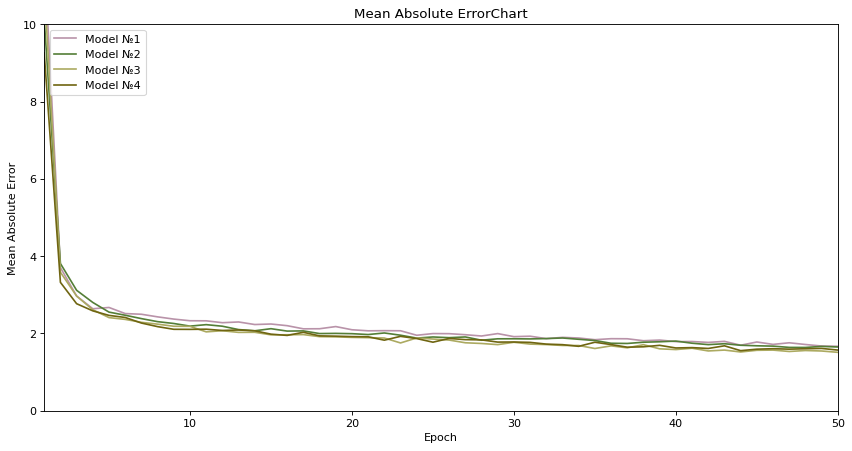

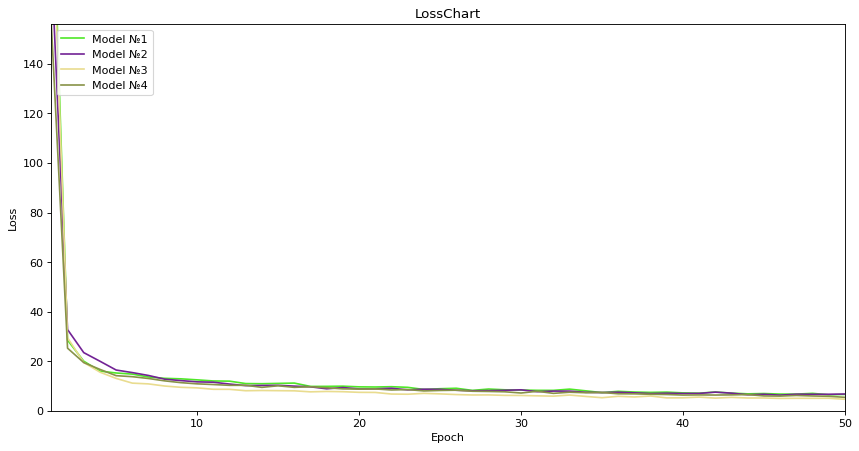

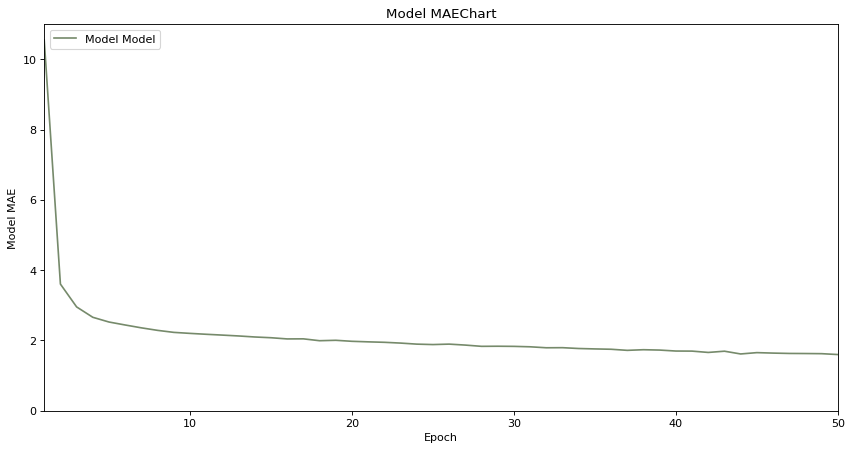

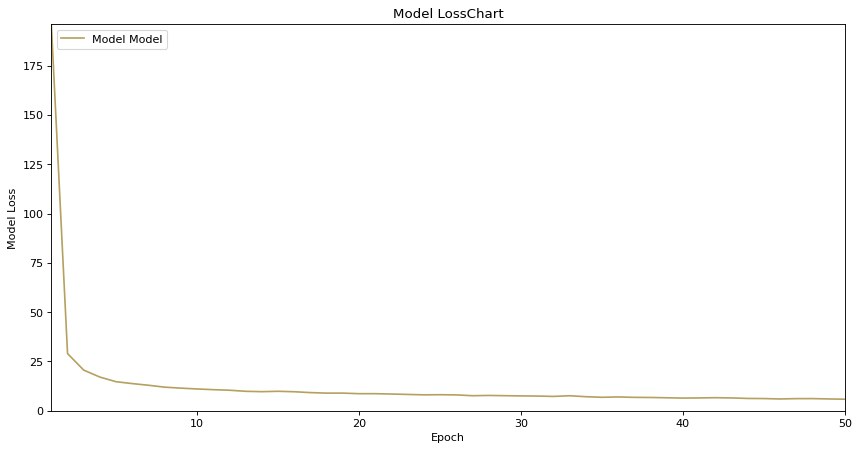

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 50
all_scores = []

x_values = range(1, num_epochs + 1)

y_values_array1 = []
y_values_array2 = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    y_values1 = hist.history['mae']
    y_values2 = hist.history['loss']
    
    chart_create(1, 1, num_epochs, 0, math.ceil(max(y_values1)), 'Mean Absolute Error')
    chart_create(2, 1, num_epochs, 0, math.ceil(max(y_values2)), 'Loss')
    
    chart_printline(1, x_values, y_values1, 'Model №' + str(i+1))
    chart_printline(2, x_values, y_values2, 'Model №' + str(i+1))
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
    y_values_array1.append(y_values1)
    y_values_array2.append(y_values2)
    
print(np.mean(all_scores))

y_values_mean1 = []
y_values_mean2 = []

for i in range(len(y_values_array1[0])):
    mean_row = []
    for j in range(len(y_values_array1)):
        mean_row.append(y_values_array1[j][i])
    y_values_mean1.append(np.mean(mean_row))
    
for i in range(len(y_values_array2[0])):
    mean_row = []
    for j in range(len(y_values_array2)):
        mean_row.append(y_values_array2[j][i])
    y_values_mean2.append(np.mean(mean_row))  

chart_create(3, 1, num_epochs, 0, math.ceil(max(y_values_mean1)), 'Model MAE')
chart_create(4, 1, num_epochs, 0, math.ceil(max(y_values_mean2)), 'Model Loss')

chart_printline(3, x_values, y_values_mean1, 'Model Model')
chart_printline(4, x_values, y_values_mean2, 'Model Model')

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
2.7728596329689026


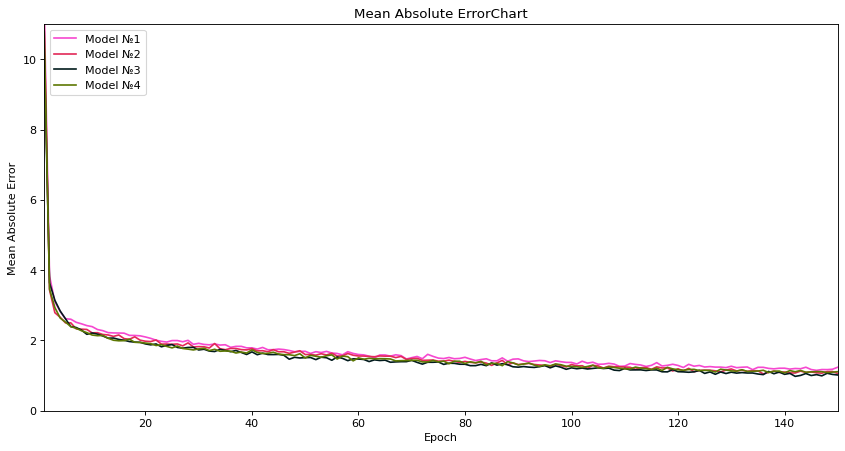

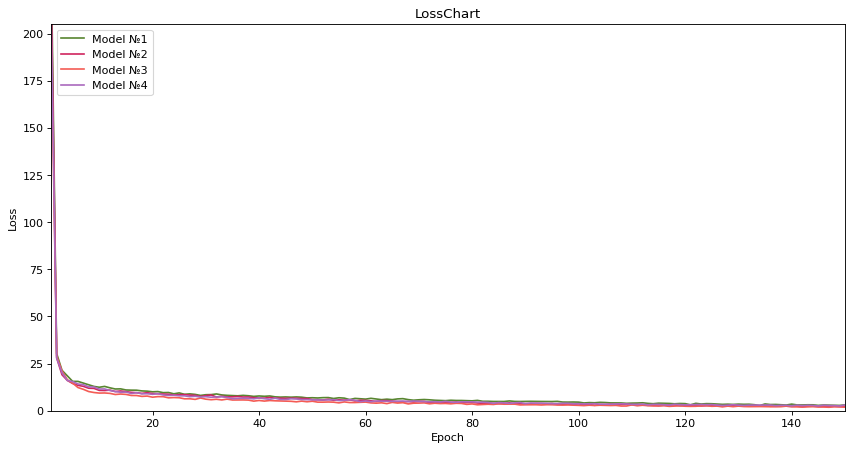

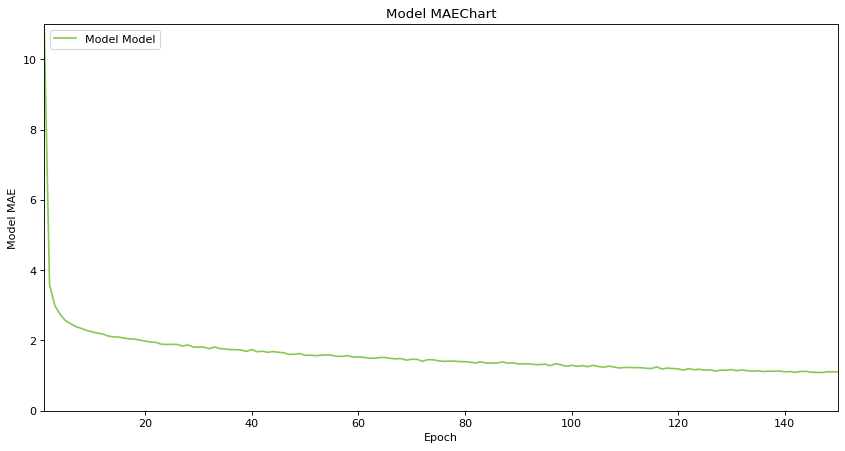

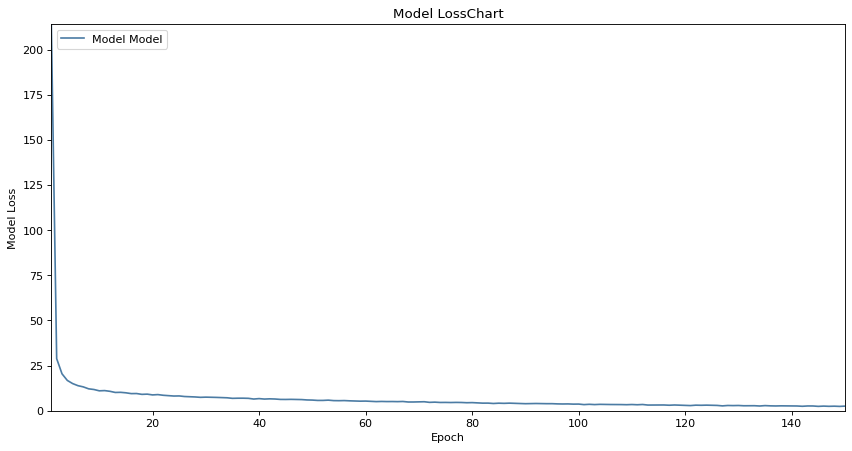

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 150
all_scores = []

x_values = range(1, num_epochs + 1)

y_values_array1 = []
y_values_array2 = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    y_values1 = hist.history['mae']
    y_values2 = hist.history['loss']
    
    chart_create(1, 1, num_epochs, 0, math.ceil(max(y_values1)), 'Mean Absolute Error')
    chart_create(2, 1, num_epochs, 0, math.ceil(max(y_values2)), 'Loss')
    
    chart_printline(1, x_values, y_values1, 'Model №' + str(i+1))
    chart_printline(2, x_values, y_values2, 'Model №' + str(i+1))
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
    y_values_array1.append(y_values1)
    y_values_array2.append(y_values2)
    
print(np.mean(all_scores))

y_values_mean1 = []
y_values_mean2 = []

for i in range(len(y_values_array1[0])):
    mean_row = []
    for j in range(len(y_values_array1)):
        mean_row.append(y_values_array1[j][i])
    y_values_mean1.append(np.mean(mean_row))
    
for i in range(len(y_values_array2[0])):
    mean_row = []
    for j in range(len(y_values_array2)):
        mean_row.append(y_values_array2[j][i])
    y_values_mean2.append(np.mean(mean_row))  

chart_create(3, 1, num_epochs, 0, math.ceil(max(y_values_mean1)), 'Model MAE')
chart_create(4, 1, num_epochs, 0, math.ceil(max(y_values_mean2)), 'Model Loss')

chart_printline(3, x_values, y_values_mean1, 'Model Model')
chart_printline(4, x_values, y_values_mean2, 'Model Model')

## Вопрос 3 Выявить точку переобучения

На основе вышепреведенных результатов можно сделать вывод что переобучение модели достигается при количестве эпох 150 и выше

## Вопрос 4 Применить перекрестную проверку по K блокам при различных K

processing fold # 0
processing fold # 1
processing fold # 2
2.5123305320739746


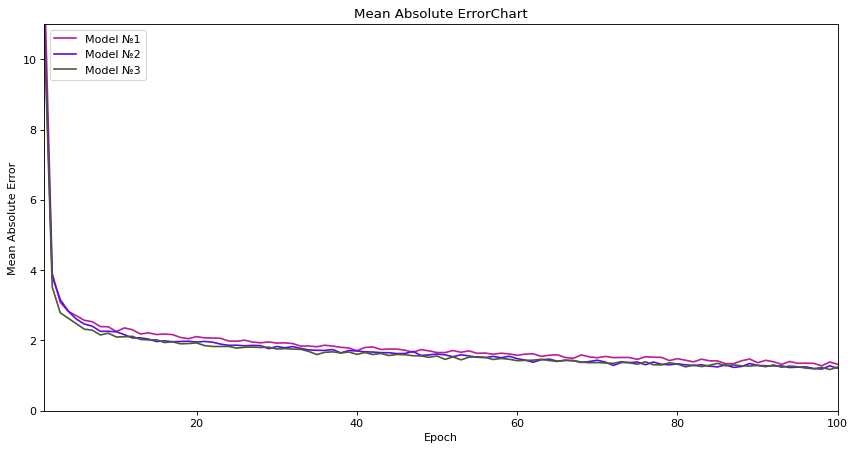

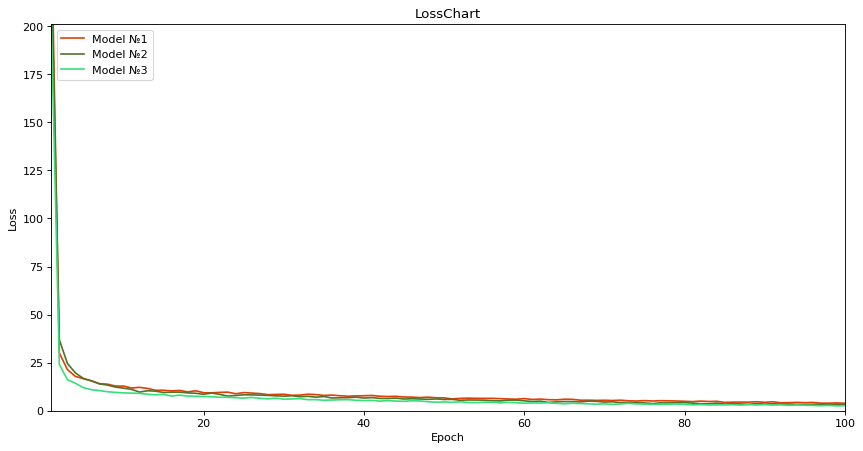

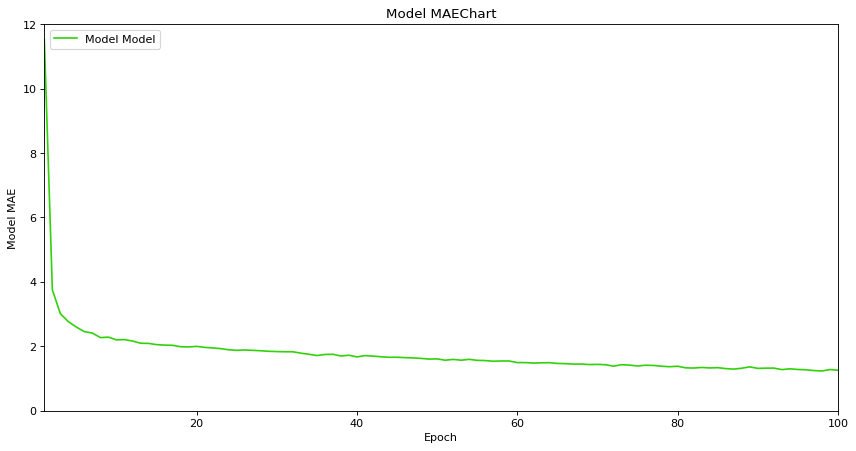

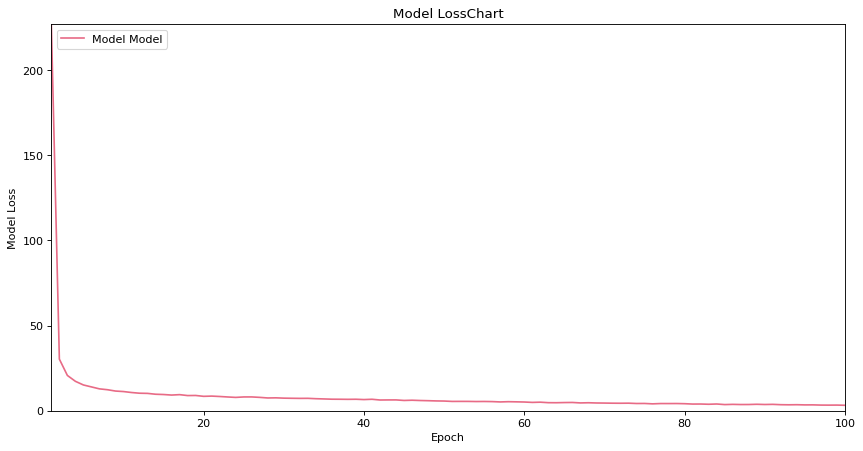

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 3
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

x_values = range(1, num_epochs + 1)

y_values_array1 = []
y_values_array2 = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    y_values1 = hist.history['mae']
    y_values2 = hist.history['loss']
    
    chart_create(1, 1, num_epochs, 0, math.ceil(max(y_values1)), 'Mean Absolute Error')
    chart_create(2, 1, num_epochs, 0, math.ceil(max(y_values2)), 'Loss')
    
    chart_printline(1, x_values, y_values1, 'Model №' + str(i+1))
    chart_printline(2, x_values, y_values2, 'Model №' + str(i+1))
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
    y_values_array1.append(y_values1)
    y_values_array2.append(y_values2)
    
print(np.mean(all_scores))

y_values_mean1 = []
y_values_mean2 = []

for i in range(len(y_values_array1[0])):
    mean_row = []
    for j in range(len(y_values_array1)):
        mean_row.append(y_values_array1[j][i])
    y_values_mean1.append(np.mean(mean_row))
    
for i in range(len(y_values_array2[0])):
    mean_row = []
    for j in range(len(y_values_array2)):
        mean_row.append(y_values_array2[j][i])
    y_values_mean2.append(np.mean(mean_row))  

chart_create(3, 1, num_epochs, 0, math.ceil(max(y_values_mean1)), 'Model MAE')
chart_create(4, 1, num_epochs, 0, math.ceil(max(y_values_mean2)), 'Model Loss')

chart_printline(3, x_values, y_values_mean1, 'Model Model')
chart_printline(4, x_values, y_values_mean2, 'Model Model')

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
2.603051519393921


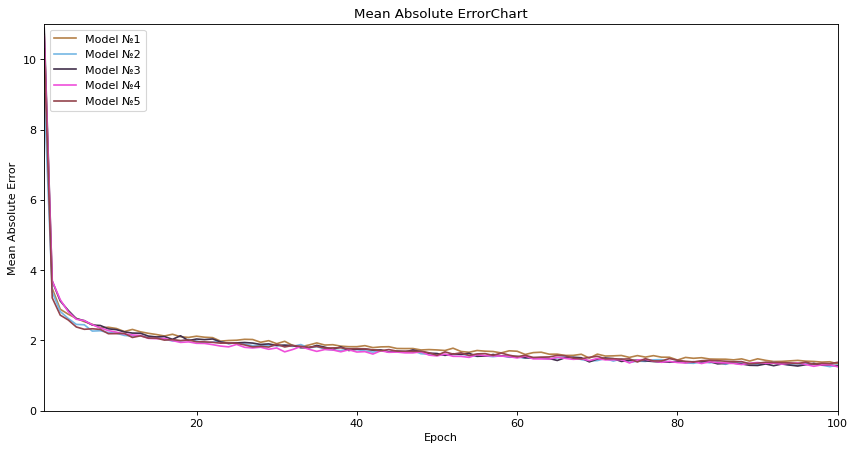

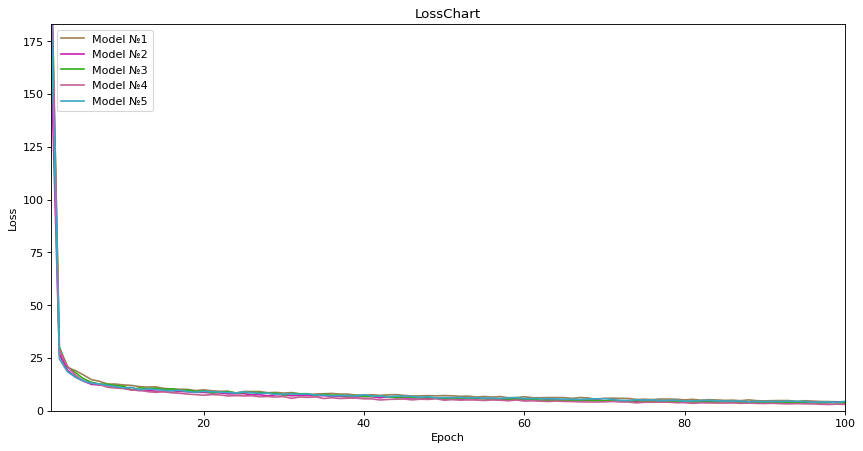

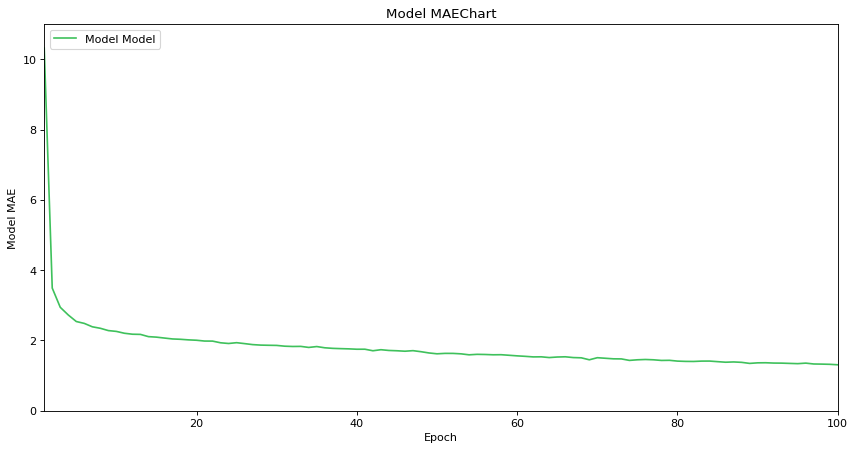

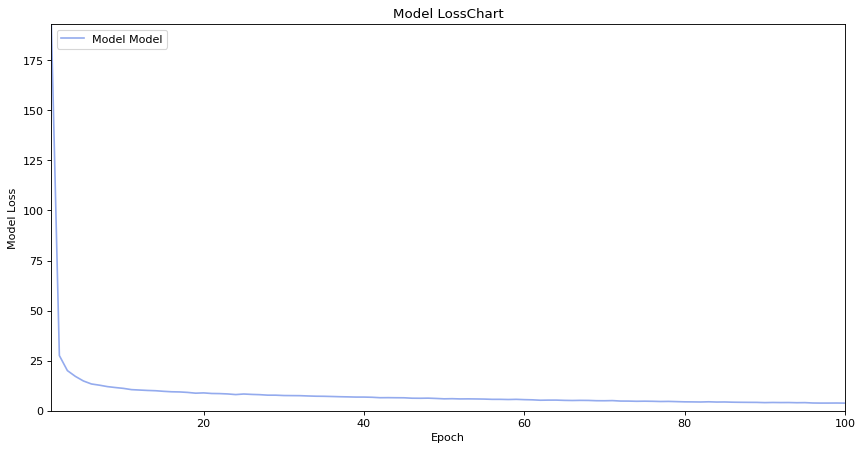

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

k = 5
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

x_values = range(1, num_epochs + 1)

y_values_array1 = []
y_values_array2 = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model = build_model()
    hist = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    y_values1 = hist.history['mae']
    y_values2 = hist.history['loss']
    
    chart_create(1, 1, num_epochs, 0, math.ceil(max(y_values1)), 'Mean Absolute Error')
    chart_create(2, 1, num_epochs, 0, math.ceil(max(y_values2)), 'Loss')
    
    chart_printline(1, x_values, y_values1, 'Model №' + str(i+1))
    chart_printline(2, x_values, y_values2, 'Model №' + str(i+1))
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
    y_values_array1.append(y_values1)
    y_values_array2.append(y_values2)
    
print(np.mean(all_scores))

y_values_mean1 = []
y_values_mean2 = []

for i in range(len(y_values_array1[0])):
    mean_row = []
    for j in range(len(y_values_array1)):
        mean_row.append(y_values_array1[j][i])
    y_values_mean1.append(np.mean(mean_row))
    
for i in range(len(y_values_array2[0])):
    mean_row = []
    for j in range(len(y_values_array2)):
        mean_row.append(y_values_array2[j][i])
    y_values_mean2.append(np.mean(mean_row))  

chart_create(3, 1, num_epochs, 0, math.ceil(max(y_values_mean1)), 'Model MAE')
chart_create(4, 1, num_epochs, 0, math.ceil(max(y_values_mean2)), 'Model Loss')

chart_printline(3, x_values, y_values_mean1, 'Model Model')
chart_printline(4, x_values, y_values_mean2, 'Model Model')

In [ ]:
На основе вышепреведнных графиков, можно сделать вывод, что создание большого количества блоков и 
увелечение количества эпох приводит к переобучению модели и неточным результатам.